In [26]:
import statsmodels.api as sm
# this is the standard import if you're using "formula notation" (similar to R)
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as multi
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv("C:/Users/ouaga/Dropbox/PythonScripts/Anova/SystolicBloodPressure.csv")

In [28]:
df.head(20)

,Treatment,Blood_Pressure
0,Medication,10
1,Medication,12
2,Medication,9
3,Medication,15
4,Medication,13
5,Exercise,6
6,Exercise,8
7,Exercise,3
8,Exercise,0
9,Exercise,2


In [ ]:
pivoted_df = df.pivot( columns='Treatment', values='Blood_Pressure')

### Fit the ANOVA model to data

In [39]:
model = smf.ols('Blood_Pressure ~ C(Treatment)', data=df).fit()
aov_table = anova_lm(model, typ=2)

In [40]:
print(aov_table)

               sum_sq    df         F    PR(>F)
Treatment  160.133333   2.0  9.167939  0.003831
Residual   104.800000  12.0       NaN       NaN


### Find out which pair of treatments are significantly different from each other

In [35]:
# Multile comparison of income groups for PCT Tuning Hispanics
mcTreatment    = multi.MultiComparison(df['Blood_Pressure'], df['Treatment'])
results_Treatment  = mcTreatment.tukeyhsd()
print(results_Treatment.summary())

 Multiple Comparison of Means - Tukey HSD,FWER=0.05
 group1    group2   meandiff  lower   upper  reject
---------------------------------------------------
  Diet    Exercise    -3.8   -8.7839  1.1839 False 
  Diet   Medication   4.2    -0.7839  9.1839 False 
Exercise Medication   8.0     3.0161 12.9839  True 
---------------------------------------------------


## Box plot display to compare the means and variability of blood pressure

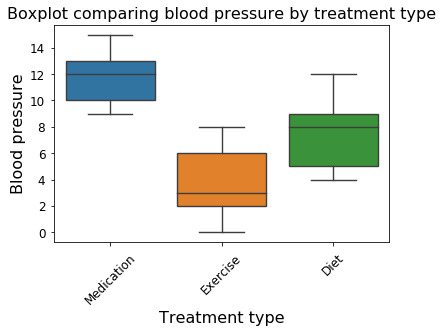

In [36]:
sns.set_context("paper", font_scale=1.5, rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16}) 
plt.title('Boxplot comparing blood pressure by treatment type')
sns.boxplot(x='Treatment', y='Blood_Pressure', data=df)
plt.xlabel('Treatment type')
plt.ylabel('Blood pressure')
plt.xticks(rotation=45)
plt.show()

## Model diagnostics

### Check for normality of residuals

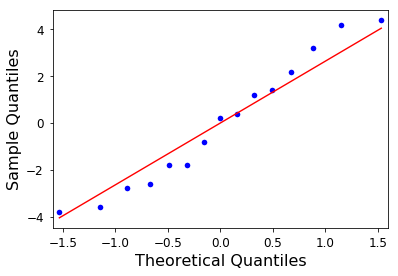

In [37]:
residuals = model.resid 
fig = sm.qqplot(residuals, line='s')
plt.show()

### Check for equality of variances of the treatments using levene test

In [ ]:
df.head(10)

In [ ]:
BP_Medication = df['Blood_Pressure'][df['Treatment']=='Medication']
BP_Exercise   = df['Blood_Pressure'][df['Treatment']=='Exercise']
BP_Diet       = df['Blood_Pressure'][df['Treatment']=='Diet']

In [38]:
import scipy.stats as stats
(test_statistic, p_value) = stats.levene(BP_Medication, BP_Exercise, BP_Diet)
print("The test statistic is: ", round(test_statistic,5))
print("The p-value is: ", round(p_value,5))


The test statistic is:  0.20455
The p-value is:  0.8178
